## Adquisición y preprocesamiento de la información

<table>
    <tr>
      <td>Grado en Ingeniería de Datos e Inteligencia Artificial - Facultad de Informática - UCM
      </td>
      <td>
      <img src="https://biblioteca.ucm.es/data/cont/media/www/pag-88746//escudo.jpg"  width=50/>
      </td>
     </tr>
</table>




# Correlaciones



### Índice
[Introducción](#Introducción)<br>
[Definición](#Definición)<br>
[Ejemplo](#Ejemplo)<br>
[A tener en cuenta](#Dibujar)<br>
[Representación gráfica](#Representación)<br>
[Variables nominales](#Nominales)<br>
[Bibliografía](#Bibliografía)<br>


<a name="Intro"></a>
## Introducción
Hasta ahora hemos considerado cada columna (cada variable) de forma independiente, viendo histogramas, outliers, etc. de forma individual. Solo hemos comparado columnas por ejemplo al hablar de los tests que nos permiten ver si tienen la misma media o si son muestras de la misma variable.

Ahora vamos a estudiar la *correlación* entre las columnas por pares. La idea es ver si dos variables tienen *relación lineal*: si cuando una crece la otra en general también (correlación positiva) o si cuando una crece la otra decrece (correlación negativa). 

Una correlación alta indica que las variables están muy relacionadas (contienen información muy similar). Esto implica:

- Si una de las variables es una variable a predecir se podrá hacer muy bien a partir de la otra (por ejemplo con regresión lineal)

- Si las dos variables son características de un objeto puede que nos interese quitar una porque estamos "reforzando" o "duplicando" la misma información y eso puede tener influencia negativa en algunos métodos de aprendizaje automático.

Para más detalles ver la [bibliografía](#Bibliografía)

<a name="Definición"></a>
## Definición

Para estudiar la correlación entre dos variables se suele utilizar el *coeficiente de correlación de Pearson* 

$$
r = \frac{\sum(x_i - \overline{x})(y_i - \overline{y})}{\sum(x_i - \overline{x})^2(y_i - \overline{y})^2}
$$

Es un valor que está entre -1 y +1. Algunos ejemplos:


<img src="https://www.statlect.com/images/linear-correlation-coefficient.png" />

<a name="Ejemplo"></a>
## Ejemplo
Por fortuna no tenemos que calcular las correlaciones; Pandas ya incluye un método [df.corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

Supongamos que queremos saber qué dos comunidades tienen mayor correlación en sus datos de paro

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/parocomunidades.csv"


df = pd.read_csv(url, encoding="latin1")
df

,Comunidad,Periodo,Total
0,Andalucía,2019,20.80
1,Andalucía,2018,21.26
2,Andalucía,2017,24.43
3,Andalucía,2016,28.25
4,Andalucía,2015,29.83
...,...,...,...
337,Melilla,2006,9.86
338,Melilla,2005,12.33
339,Melilla,2004,12.49
340,Melilla,2003,19.88


Vaya...las comunidades deberían ser columnas, qué hacer?

In [3]:
df_ancho = df.pivot(index='Periodo', columns='Comunidad', values='Total')
df_ancho

Comunidad,Andalucía,Aragón,Asturias,Balears. Illes,Canarias,Cantabria,Castilla - La Mancha,Castilla y León,Cataluña,Ceuta,Comunitat Valenciana,Extremadura,Galicia,La Rioja,Madrid,Melilla,Murcia,Navarra,País Vasco
Periodo,,,,,,,,,,,,,,,,,,,
2002,20.15,6.54,10.12,8.69,11.32,10.58,9.85,10.15,10.61,5.70,10.71,18.91,11.89,5.65,6.99,3.57,11.45,5.58,9.64
2003,18.35,6.53,10.14,10.01,12.04,10.42,9.80,11.02,9.72,9.65,10.68,17.14,13.46,6.75,7.16,19.88,10.76,6.16,9.93
2004,15.99,5.56,10.24,8.09,10.75,11.10,10.20,10.48,9.32,6.59,10.11,17.65,12.47,4.68,6.95,12.49,9.96,5.14,9.26
2005,13.80,5.76,9.30,7.50,10.88,8.01,9.42,8.53,6.63,17.14,8.13,15.16,9.14,6.69,5.90,12.33,7.43,5.92,6.45
2006,12.22,4.99,9.09,6.34,11.37,5.87,8.05,7.58,6.56,14.44,8.48,12.94,7.88,6.88,6.46,9.86,7.85,4.59,6.92
2007,13.96,5.12,8.00,9.35,10.89,4.72,8.10,6.94,6.50,20.18,8.94,14.79,7.46,5.88,6.40,17.43,8.25,4.28,5.90
2008,21.66,9.71,10.00,12.05,20.99,8.81,15.04,11.40,11.75,15.66,14.58,18.11,9.64,9.80,10.02,16.17,15.29,8.13,8.48
2009,26.27,13.57,14.13,19.45,26.77,12.70,19.29,14.21,16.90,24.01,22.09,21.21,12.80,13.76,14.48,19.87,21.84,10.51,12.13
2010,28.04,16.29,16.61,21.78,28.78,14.67,21.72,15.78,17.86,24.83,22.57,23.95,15.62,15.58,15.54,24.46,24.45,11.77,10.98


In [5]:
correlaciones = df_ancho.corr()
correlaciones

Comunidad,Andalucía,Aragón,Asturias,Balears. Illes,Canarias,Cantabria,Castilla - La Mancha,Castilla y León,Cataluña,Ceuta,Comunitat Valenciana,Extremadura,Galicia,La Rioja,Madrid,Melilla,Murcia,Navarra,País Vasco
Comunidad,,,,,,,,,,,,,,,,,,,
Andalucía,1.000000,0.977459,0.953459,0.905497,0.960734,0.947519,0.979060,0.981304,0.979066,0.783265,0.973228,0.957001,0.945031,0.937522,0.975621,0.776738,0.978164,0.966533,0.957361
Aragón,0.977459,1.000000,0.949875,0.928527,0.986693,0.913081,0.980527,0.965258,0.969260,0.852749,0.982463,0.930858,0.907547,0.977660,0.987575,0.808207,0.987775,0.978610,0.917932
Asturias,0.953459,0.949875,1.000000,0.878793,0.921376,0.961087,0.970881,0.973286,0.954366,0.827492,0.942779,0.950776,0.949470,0.936812,0.958349,0.797641,0.955940,0.979924,0.938522
Balears. Illes,0.905497,0.928527,0.878793,1.000000,0.932623,0.838444,0.885875,0.888571,0.956256,0.752239,0.963217,0.814481,0.825752,0.953169,0.926478,0.668523,0.948640,0.903984,0.833694
Canarias,0.960734,0.986693,0.921376,0.932623,1.000000,0.874083,0.973624,0.934923,0.958420,0.847961,0.985358,0.903911,0.854918,0.972845,0.985108,0.802989,0.984022,0.962621,0.878033
Cantabria,0.947519,0.913081,0.961087,0.838444,0.874083,1.000000,0.934094,0.976691,0.937449,0.694599,0.910388,0.928329,0.976181,0.874063,0.917857,0.741418,0.925189,0.930578,0.955500
Castilla - La Mancha,0.979060,0.980527,0.970881,0.885875,0.973624,0.934094,1.000000,0.970521,0.957444,0.856901,0.967978,0.966359,0.924255,0.949840,0.986499,0.838195,0.975417,0.982684,0.927718
Castilla y León,0.981304,0.965258,0.973286,0.888571,0.934923,0.976691,0.970521,1.000000,0.970011,0.772598,0.955529,0.940433,0.973063,0.933914,0.963116,0.778747,0.962545,0.967550,0.973828
Cataluña,0.979066,0.969260,0.954366,0.956256,0.958420,0.937449,0.957444,0.970011,1.000000,0.760646,0.987131,0.917137,0.925310,0.953881,0.968434,0.713820,0.985814,0.964614,0.945149


¿Entre qué dos comunidades diferentes hay mayor correlación? ¿y menos?

Comunidad,Comunitat Valenciana,Murcia
Comunidad,,
Comunitat Valenciana,NaN,0.991608
Murcia,0.991608,NaN


<a name="Dibujar"></a>
## A tener en cuenta

En el caso de las correlaciones (como en todos) no hay que precipitarse en sacar conclusiones. En particular:

- Que haya correlación no significa que los valores sean "parecidos" sino que se mueven a la vez (en la misma dirección o contraria)

- Correlación no implica causalidad, en ocasiones puede haber otra variable que esté "moviendo" las dos variables correlaciones 

- Ya hemos visto que puede haber correlación de otros tipos que no está detectada por nuestro método (la correlación de Pearson); pero es que también sucede al revés, podemos encontrar correlación y que no signifique lo que creemos:

<img src="https://github.com/RafaelCaballero/tdm/raw/master/images/Situations-in-which-linear-correlation-should-not-be-used-a-two-variables-have-a.png" />

Vamos a mostrar los datos de las dos comunidades más correlacionadas a ver si es uno de estos casos:

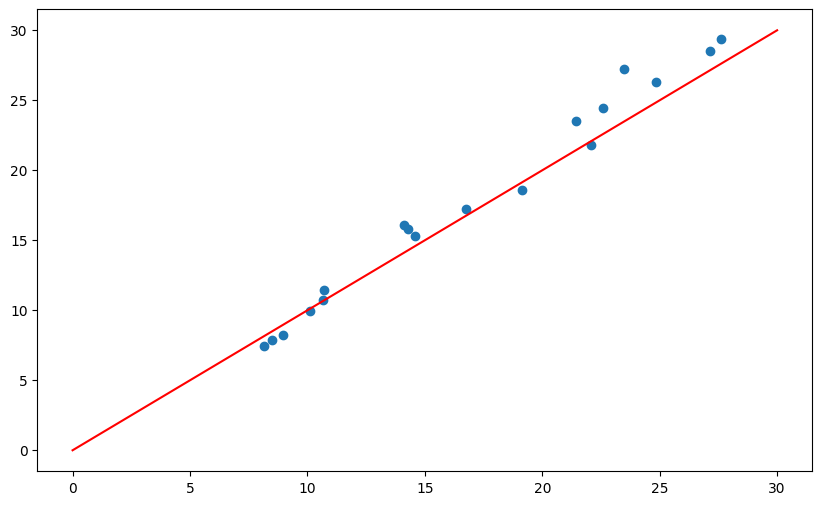

In [25]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_ancho["Comunitat Valenciana"],df_ancho["Murcia"])
ax.plot([0,30],[0,30],color="red")
plt.show()

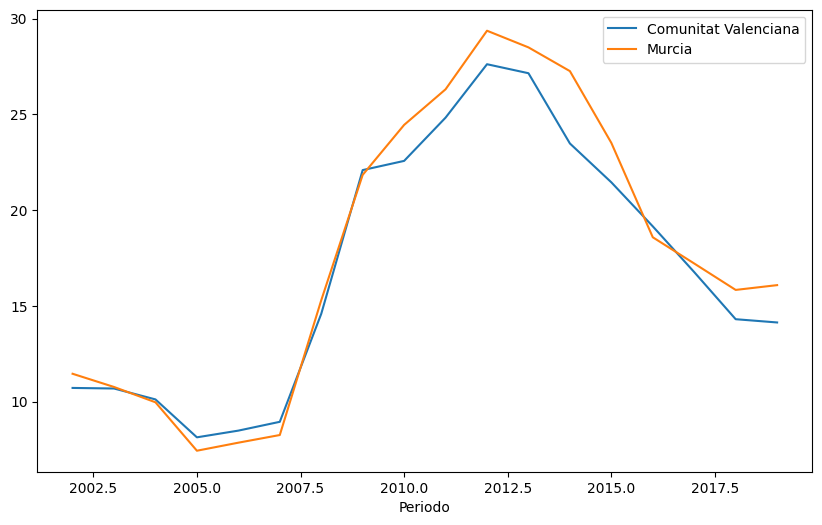

In [31]:
# otra forma 
fig, ax = plt.subplots(figsize=(10, 6))
cs = ["Comunitat Valenciana","Murcia"]
for c in cs:
    df_ancho[c].plot(ax=ax,label=c)
ax.legend()    
plt.show()

<a name="Representación"></a>
## Representación

La tabla de correlaciones se puede mostrar de forma más informativa, veamos cómo:

In [50]:

correlaciones.style.background_gradient()

Comunidad,Andalucía,Aragón,Asturias,Balears. Illes,Canarias,Cantabria,Castilla - La Mancha,Castilla y León,Cataluña,Ceuta,Comunitat Valenciana,Extremadura,Galicia,La Rioja,Madrid,Melilla,Murcia,Navarra,País Vasco
Comunidad,,,,,,,,,,,,,,,,,,,
Andalucía,1.000000,0.977459,0.953459,0.905497,0.960734,0.947519,0.979060,0.981304,0.979066,0.783265,0.973228,0.957001,0.945031,0.937522,0.975621,0.776738,0.978164,0.966533,0.957361
Aragón,0.977459,1.000000,0.949875,0.928527,0.986693,0.913081,0.980527,0.965258,0.969260,0.852749,0.982463,0.930858,0.907547,0.977660,0.987575,0.808207,0.987775,0.978610,0.917932
Asturias,0.953459,0.949875,1.000000,0.878793,0.921376,0.961087,0.970881,0.973286,0.954366,0.827492,0.942779,0.950776,0.949470,0.936812,0.958349,0.797641,0.955940,0.979924,0.938522
Balears. Illes,0.905497,0.928527,0.878793,1.000000,0.932623,0.838444,0.885875,0.888571,0.956256,0.752239,0.963217,0.814481,0.825752,0.953169,0.926478,0.668523,0.948640,0.903984,0.833694
Canarias,0.960734,0.986693,0.921376,0.932623,1.000000,0.874083,0.973624,0.934923,0.958420,0.847961,0.985358,0.903911,0.854918,0.972845,0.985108,0.802989,0.984022,0.962621,0.878033
Cantabria,0.947519,0.913081,0.961087,0.838444,0.874083,1.000000,0.934094,0.976691,0.937449,0.694599,0.910388,0.928329,0.976181,0.874063,0.917857,0.741418,0.925189,0.930578,0.955500
Castilla - La Mancha,0.979060,0.980527,0.970881,0.885875,0.973624,0.934094,1.000000,0.970521,0.957444,0.856901,0.967978,0.966359,0.924255,0.949840,0.986499,0.838195,0.975417,0.982684,0.927718
Castilla y León,0.981304,0.965258,0.973286,0.888571,0.934923,0.976691,0.970521,1.000000,0.970011,0.772598,0.955529,0.940433,0.973063,0.933914,0.963116,0.778747,0.962545,0.967550,0.973828
Cataluña,0.979066,0.969260,0.954366,0.956256,0.958420,0.937449,0.957444,0.970011,1.000000,0.760646,0.987131,0.917137,0.925310,0.953881,0.968434,0.713820,0.985814,0.964614,0.945149


Con seaborn

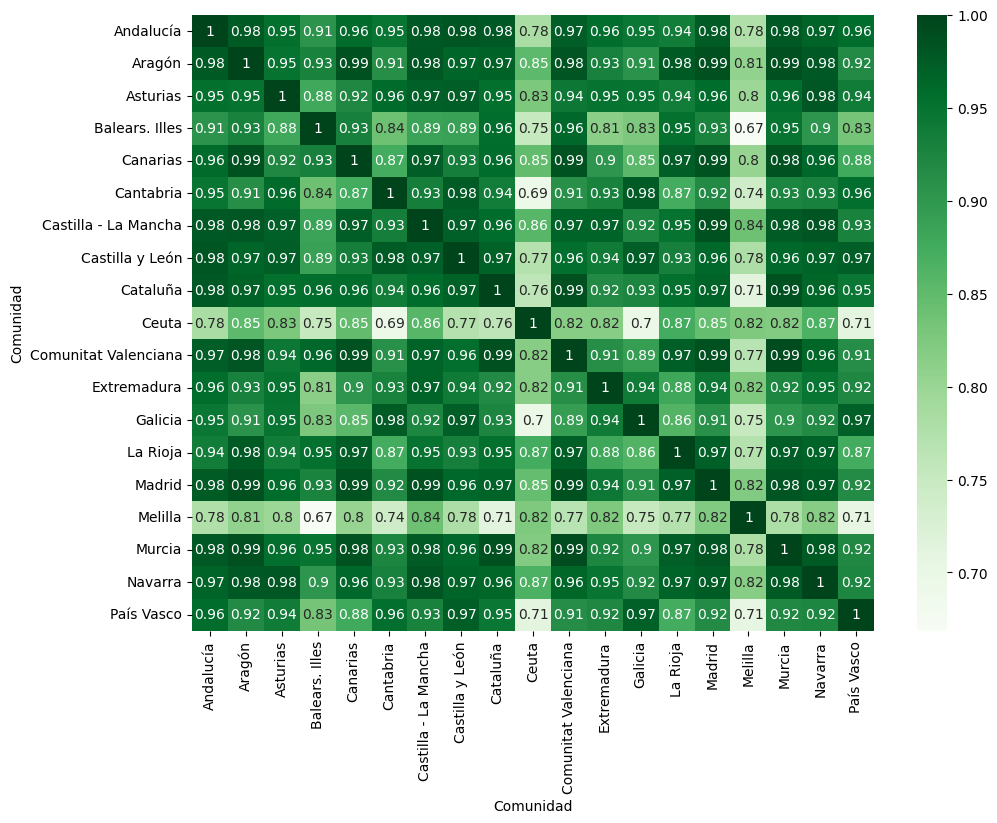

In [51]:
import seaborn as sns
plt.figure(figsize=(11,8))
sns.heatmap(correlaciones, cmap="Greens",annot=True)
plt.show()

Hay otras posibilidades más complejas que por ejemplo crean grupos (clústers) de atributos correlacionados

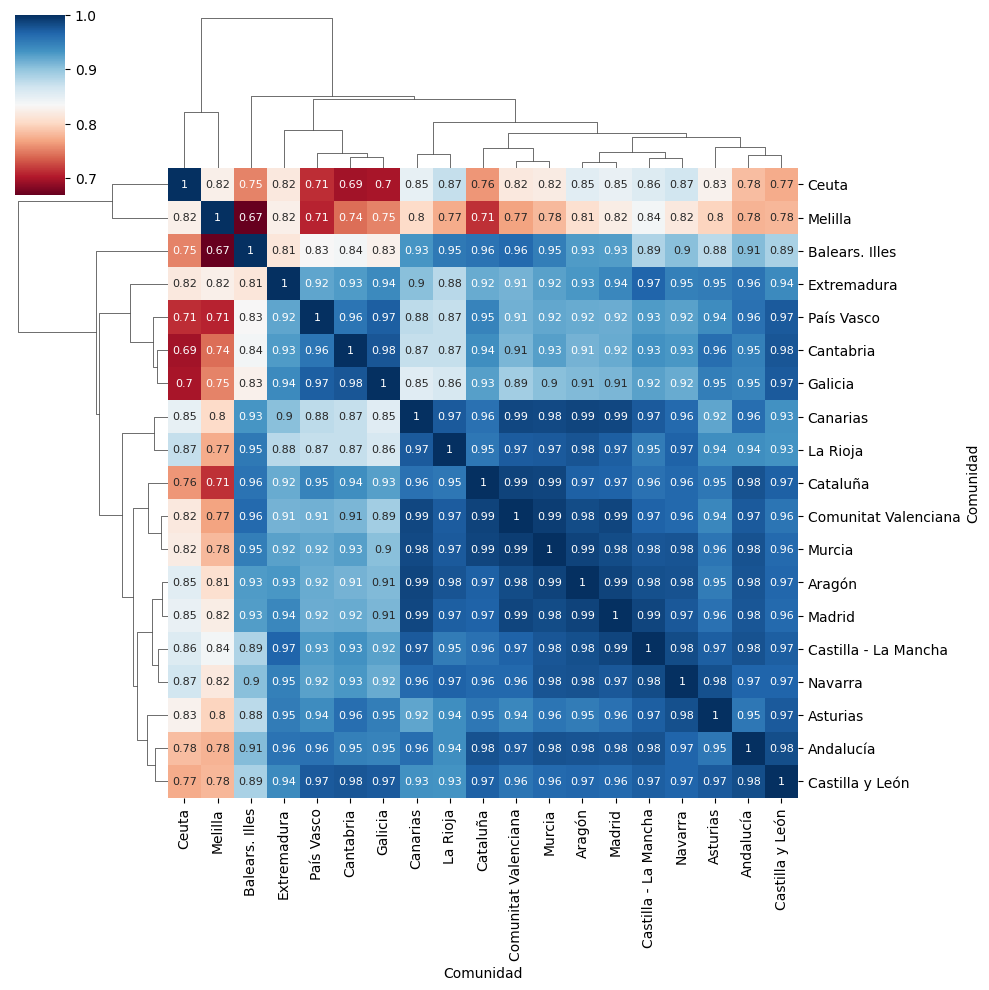

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.clustermap(df_ancho.corr(), 
                   method = 'complete', 
                   cmap   = 'RdBu', 
                   annot  = True, 
                   annot_kws = {'size': 8})

Si se quieren ver las gráficas una a una:

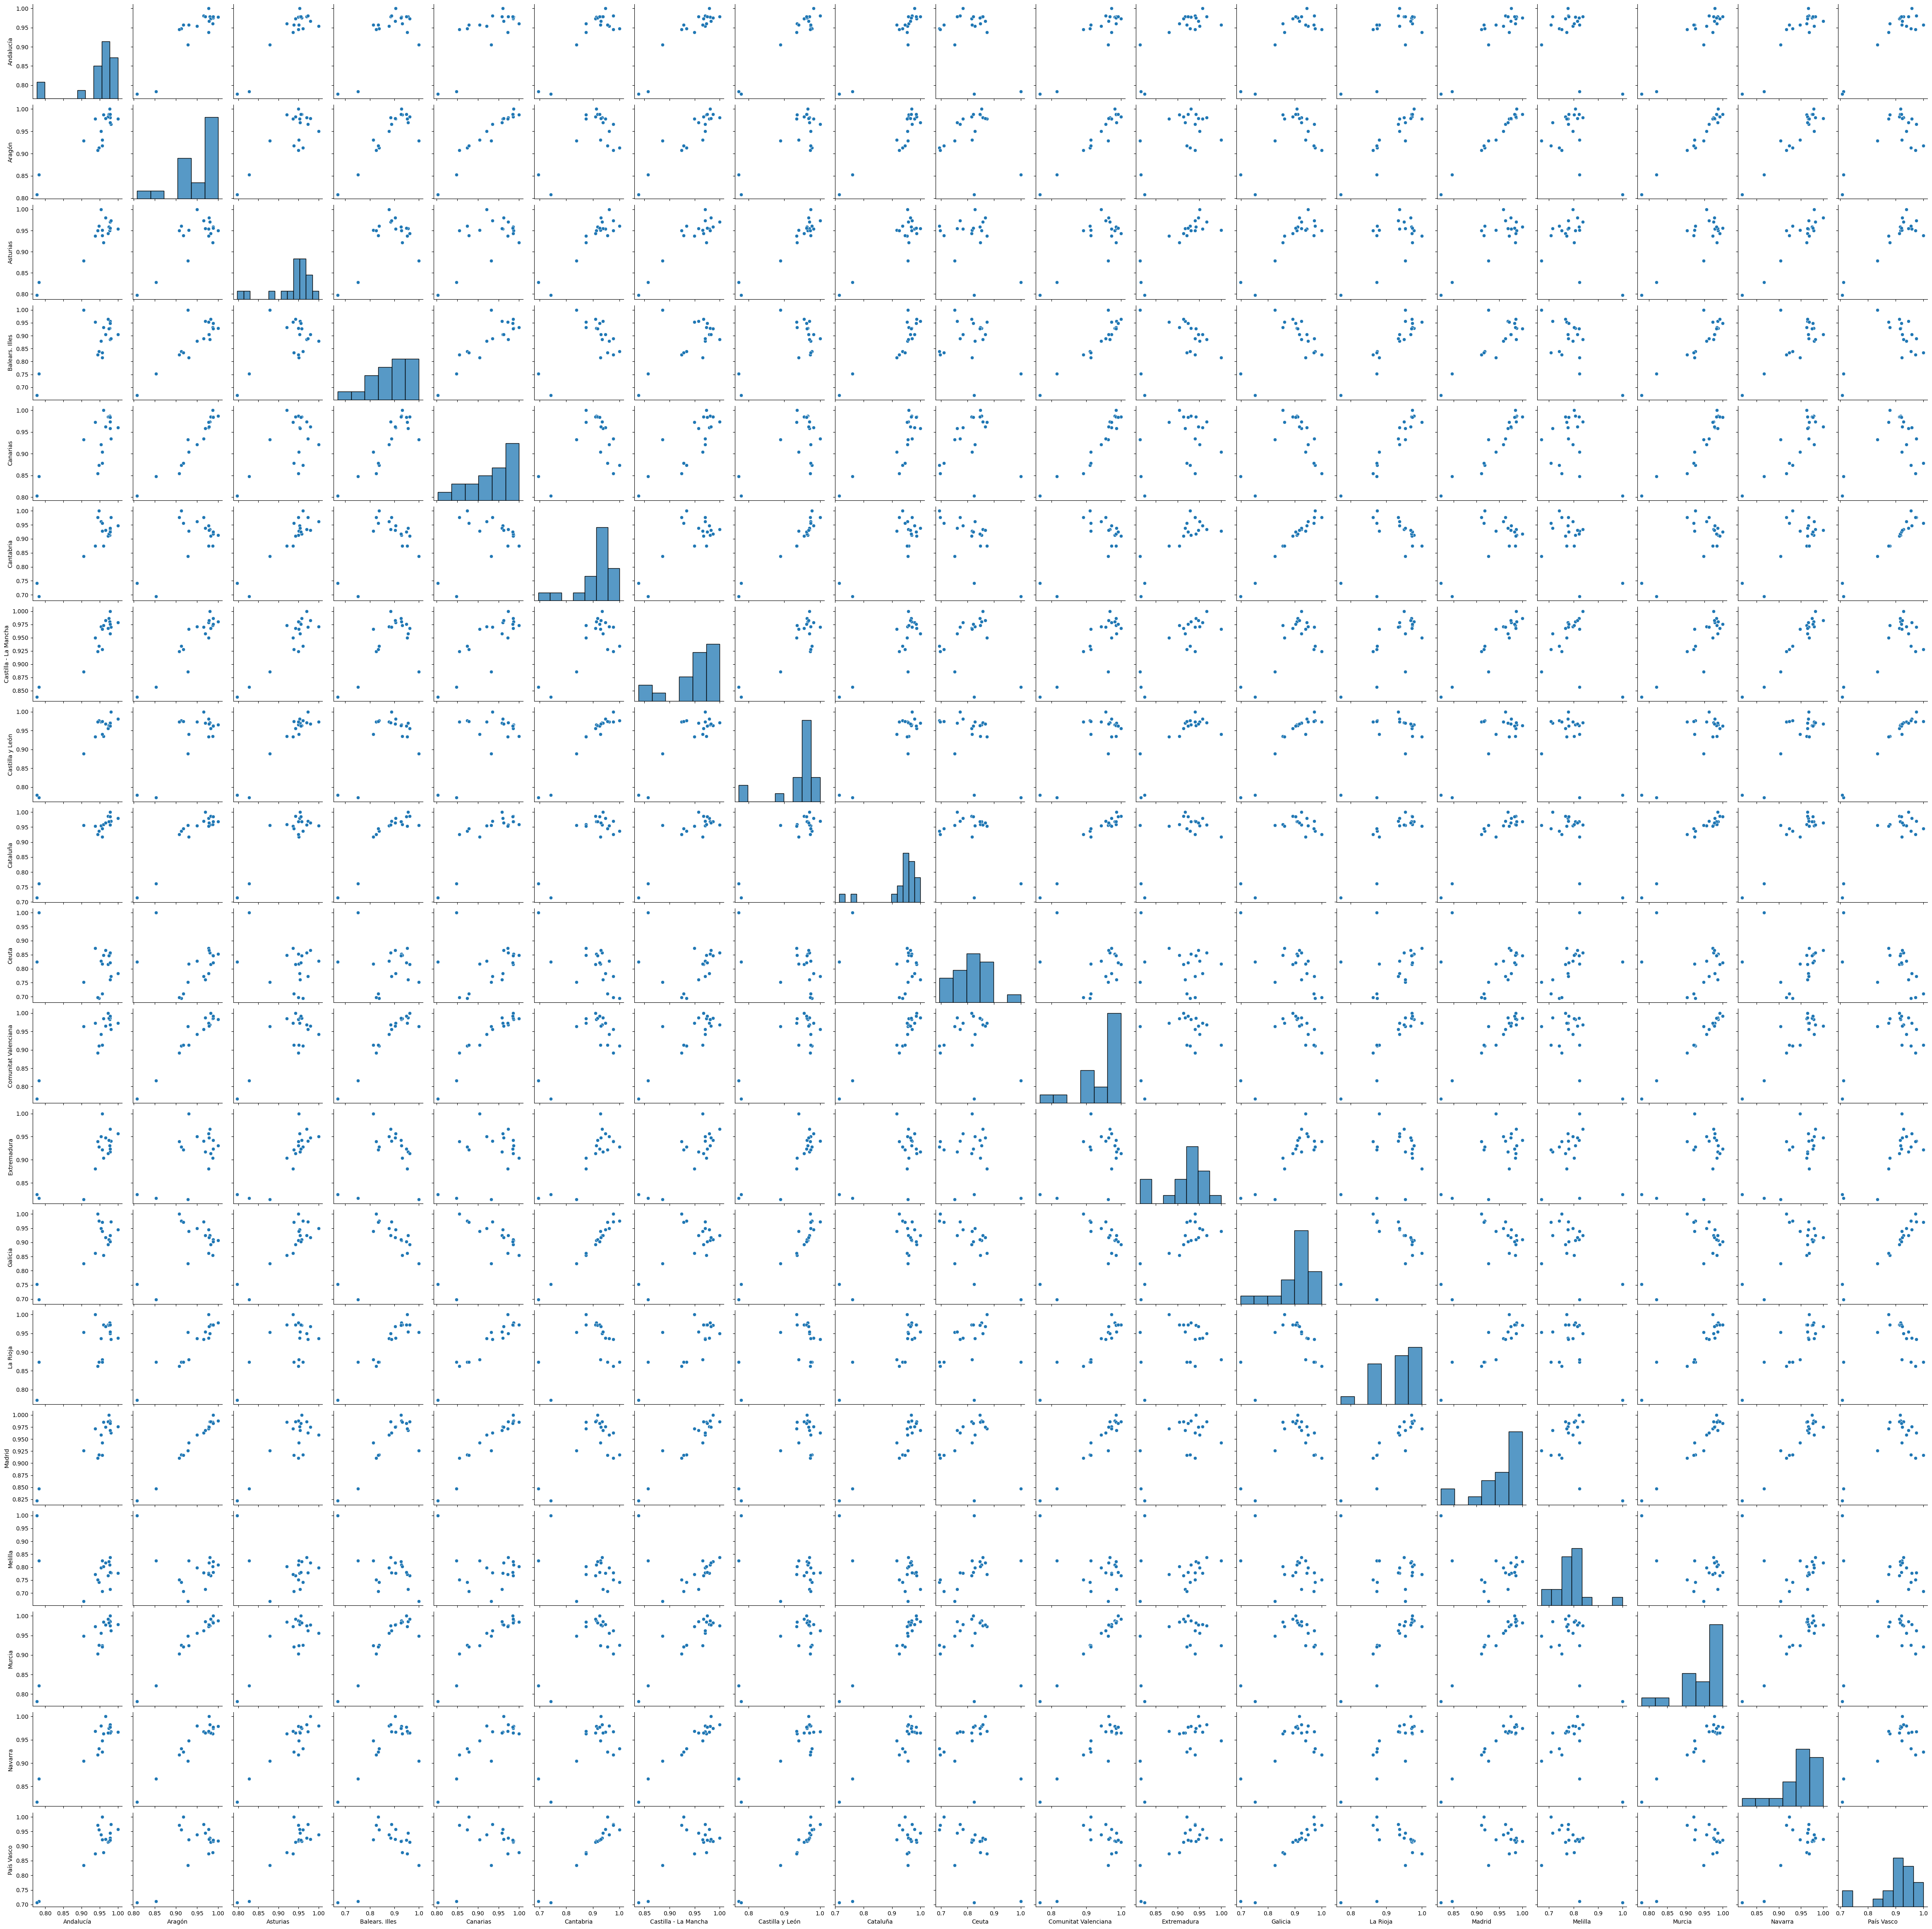

In [53]:
sns.pairplot(df_ancho.corr())

<a name="Nominales"></a>
## Variables nominales

Si una variable es nominal/ordinal y la otra intervalo/ratio lo que se haría es convertir la variable nominal a números (ya veremos como) y usar correlación normal.

En el caso de dos variables "categóricas" (nominales u ordinales) podemos utilizar el test de la  $\mathcal{X}^2$ (chi-squared en inglés). Al ser un test solo dice si hay correlación o no, no cuánta (aunque se puede mirar el estadístico). Por eso es mejor hablar de *asociación* dejando el término *correlación* para variables tipo ratio.

En este test $H_0$ = No hay correlación entre las variables.

Por tantp, si $p<0.05$ rechazaremos $H_0$ y diremos que sí hay correlación entre las variables, en otro caso no podemos asegurar que no haya correlación.

Ejemplo:

In [59]:
url = "https://github.com/RafaelCaballero/tdm/raw/master/datos/Ventas%20Videojuegos.xlsx"
df = pd.read_excel(url)
df

,Nombre,Plataforma,Año,Genero,Editorial,Ventas NA,Ventas EU,Ventas JP,Ventas Otros,Ventas Global
0,Wii Sports,Wii,2006,Sports,Nintendo,41.50,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16321,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01
16322,Rugby Challenge 3,XOne,2016,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01
16323,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.00,0.01
16324,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01


In [75]:
df2 = df[df.Plataforma.isin(df.Plataforma.value_counts()[0:5].index)]

¿Están relacionados el género y la plataforma? 

El primer paso es obtener la *tabla de contingencias* de las dos variables 

In [77]:
contingencias=pd.crosstab(index=df2.Plataforma,columns=df2.Genero)
contingencias

Genero,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Plataforma,,,,,,,,,,,,
DS,336,238,36,389,90,236,66,196,42,279,146,78
PS2,345,196,146,218,101,18,212,183,158,89,391,70
PS3,373,72,76,121,36,2,90,117,155,30,210,22
Wii,230,83,41,272,57,54,92,35,61,84,256,25
X360,318,47,65,122,24,6,102,76,197,36,215,27


Es sobre esta tabla sobre la que hacemos el test:


In [78]:
from scipy.stats import chi2_contingency
 
# este es el test
ChiSqResult = chi2_contingency(contingencias)
ChiSqResult

Chi2ContingencyResult(statistic=1584.9838847918977, pvalue=1.0169947057435031e-303, dof=44, expected_freq=array([[422.28783383, 167.64985163,  95.95054402, 295.75964392,
         81.18892186,  83.29772502, 148.14342235, 160.00544016,
        161.58704253, 136.54500495, 321.0652819 ,  58.51928783],
       [421.29747774, 167.25667656,  95.72551929, 295.06602374,
         80.99851632,  83.10237389, 147.79599407, 159.63019288,
        161.20808605, 136.22477745, 320.31231454,  58.38204748],
       [258.28486647, 102.54005935,  58.68644906, 180.89614243,
         49.65776459,  50.94757666,  90.60929773,  97.8644906 ,
         98.83184965,  83.51533136, 196.37388724,  35.79228487],
       [255.51186944, 101.43916914,  58.05637982, 178.95400593,
         49.12462908,  50.40059347,  89.63649852,  96.81379822,
         97.77077151,  82.61869436, 194.26557864,  35.40801187],
       [244.61795252,  97.11424332,  55.58110781, 171.32418398,
         47.03016815,  48.25173096,  85.81478734,  92.6860

In [79]:
p = ChiSqResult[1]
p

1.0169947057435031e-303

Por tanto rechazamos la hipótesis nula; sí hay correlación entre las variables.

Otro ejemplo tomado de [aquí](https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/)

In [80]:

import pandas as pd
ColumnNames=['AGE','GENDER' ,'SALARY', 'APPROVE_LOAN']
DataValues=[ [28, 'M', 610000, 'Yes'],
             [42, 'M',140000, 'No'],
             [29, 'F',420000, 'No'],
             [30, 'M',420000, 'No'],
             [27, 'M',420000, 'No'],
             [34, 'F',190000, 'No'],
             [24, 'M',330000, 'Yes'],
             [34, 'M',160000, 'Yes'],
             [25, 'F',300000, 'Yes'],
             [34, 'M',450000, 'Yes'],
             [30, 'F',140000, 'Yes'],
             [33, 'M',600000, 'Yes'],
             [22, 'M',400000, 'Yes'],
             [25, 'F',490000, 'Yes'],
             [32, 'M',120000, 'Yes'],
             [29, 'F',360000, 'Yes'],
             [30, 'M',480000, 'Yes'],
             [29, 'F',460000, 'Yes'],
             [32, 'M',470000, 'Yes'],
             [28, 'M',400000, 'Yes']]
LoanData=pd.DataFrame(data=DataValues,columns=ColumnNames)
LoanData

,AGE,GENDER,SALARY,APPROVE_LOAN
0,28,M,610000,Yes
1,42,M,140000,No
2,29,F,420000,No
3,30,M,420000,No
4,27,M,420000,No
5,34,F,190000,No
6,24,M,330000,Yes
7,34,M,160000,Yes
8,25,F,300000,Yes
9,34,M,450000,Yes


¿Hay relación entre el sexo y que concedan el préstamo?

In [83]:
contingencias=pd.crosstab(index=LoanData.GENDER,columns=LoanData.APPROVE_LOAN)
ChiSqResult = chi2_contingency(contingencias)
ChiSqResult

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[1.75, 5.25],
       [3.25, 9.75]]))

Por tanto no podemos descartar que no haya correlación. Veamos un último caso:

In [87]:
df2 = LoanData.copy()
df2["GENDER"] = LoanData.apply(lambda x: "M" if x["APPROVE_LOAN"]=="Yes" else "F",axis=1)
contingencias=pd.crosstab(index=df2.GENDER,columns=df2.APPROVE_LOAN)
ChiSqResult = chi2_contingency(contingencias)
ChiSqResult

Chi2ContingencyResult(statistic=15.02222222222222, pvalue=0.00010625262134433874, dof=1, expected_freq=array([[ 1.25,  3.75],
       [ 3.75, 11.25]]))

 LA desventaja es que no vemos entre qué valores es la asociación, solo que existe. 
 
 
 

<a name="Bibliografía"></a>
## Bibliografía


Una explicación matemática sencilla de donde he tomado alguna imagen:
*Taboga, Marco (2021). "Linear correlation", Lectures on probability theory and mathematical statistics. Kindle Direct Publishing. Online appendix.* https://www.statlect.com/fundamentals-of-probability/linear-correlation.



Sobre correlación y causalidad:
 [Why correlation does not imply causation?](https://medium.com/@seema.singh/why-correlation-does-not-imply-causation-5b99790df07e)


 
Descripción de los distintos tipos de tests para variables categóricas y numéricas:
*Data Preprocessing in Data Mining*. Intelligent Systems Reference Library №72. Salvador García, Julián Luengo, Francisco Herrera. Spring, 2015.  Ver en particular: *3.2.1 Finding Redundant Attributes*

